## Introduction

In this Kernel, a statiscal analysis of the NCAA college basketball data will be conducted. The questions that will be asked of the data will be:

a. Is the difference between a team winning college basketball matches at home locations statistically significant from when playing at away or a neutral location? 
This question will be answered with the aid of an ANOVA (Analysis of Variance) test, followed by a pairwise Tukey HSD correlation.

b. Is there a correlation between the game by game data for a winning team?
A heat map analysis will be conducted on the data to find correlations between the game by game data.The correlation matrix from the heat data will show the correlations that exist between in game statistics during the season.

c. What is the 95% confidence interval for the difference between the standard deviations of the winning scores for the two top performing teams? This analysis will be done with a bootstrap sampling analysis, calculating these differences over 10000 replicates. The teams being considered will be Gonzaga and Kansas.



In [1]:
#Packages imported to be used for analysis

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway,ttest_ind,ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

import matplotlib.pyplot as plt
from collections import Counter

from IPython import display
from ipywidgets import interact, widgets

In [2]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")
cap = pd.read_csv("mens-machine-learning-competition-2019/TeamSpellings.csv",encoding ="latin")
#cap2 = pd.read_csv("mens-machine-learning-competition-2019/TeamSp.csv",encoding ="latin")


In [3]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [4]:
capstone.shape

(87366, 34)

In [5]:
cap.shape

(1141, 2)

In [6]:
Home=capstone.loc[lambda dfH: dfH['WLoc'] == "H", :]
Away=capstone.loc[lambda dfH: dfH['WLoc'] == "A", :]
Neutral=capstone.loc[lambda dfN: dfN['WLoc'] == "N", :]


When comparing more than two numerical datasets, the best way to preserve a Type I error probability of 0.05 is to use ANOVA. ANOVA (Analysis of Variance) tests the null hypothesis that all of the datasets have the same mean. If we reject the null hypothesis with ANOVA, we’re saying that at least one of the sets has a different mean; however, it does not tell us which datasets are different.

In [7]:
Home_Win_mean=Home["WScore"].mean
Away_Win_mean=Away["WScore"].mean
Neutral_Win_mean=Neutral["WScore"].mean

In [8]:
a=Home["WScore"]
b=Away["WScore"]
c=Neutral["WScore"]

We can use the SciPy function f_oneway to perform ANOVA on multiple datasets. It takes in each dataset as a different input and returns the t-statistic and the p-value. 

In [9]:
fstat, pval = f_oneway(a, b, c)
print (pval)

3.94760085742195e-223


The null hypothesis, in this case, is that all three populations have the same mean score on this videogame. We will reject this null hypothesis (since we are getting a p-value less than 0.05), we are reasonably confident that a pair of datasets is significantly different. After using only ANOVA, we can’t make any conclusions on which two populations between the Home, Away and Neutral locations have a significant difference.

In [10]:
# Using our data from ANOVA, we create v and l
v = np.concatenate([a, b, c])
labels = ['a'] * len(a) + ['b'] * len(b) + ['c'] * len(c)

tukey_results= pairwise_tukeyhsd(v, labels, 0.05)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b  -2.5116  0.001 -2.7069 -2.3163   True
     a      c  -2.2303  0.001 -2.5296 -1.9309   True
     b      c   0.2813 0.0968 -0.0377  0.6003  False
----------------------------------------------------


There is significant difference between the pairs  Home and Away games,and  the pairs Home and Neutral games, but there is not a significant different between the pair away and neutral games.

b. Is there a correlation between the game by game data for a winning team?
A heat map analysis will be conducted on the data to find correlations between the game by game data.The correlation matrix from the heat data will show the correlations that exist between in game statistics during the season.



In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [12]:
from heatmap import heatmap, corrplot

In [13]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [14]:
capstone_drop=capstone.drop(columns=["DayNum","Season","WLoc","WTeamID","LTeamID","LFGM","LFGM3","LFGA3","LFTM","LOR","LDR","LAst","LTO","LStl","LBlk","LPF","LFGA","LFTA","LScore"])

The column names should be self-explanatory to basketball fans (as above, "W" or "L" refers to the winning or losing team):

WFGM - field goals made (by the winning team)
WFGA - field goals attempted (by the winning team)
WFGM3 - three pointers made (by the winning team)
WFGA3 - three pointers attempted (by the winning team)
WFTM - free throws made (by the winning team)
WFTA - free throws attempted (by the winning team)
WOR - offensive rebounds (pulled by the winning team)
WDR - defensive rebounds (pulled by the winning team)
WAst - assists (by the winning team)
WTO - turnovers committed (by the winning team)
WStl - steals (accomplished by the winning team)
WBlk - blocks (accomplished by the winning team)
WPF - personal fouls committed (by the winning team)

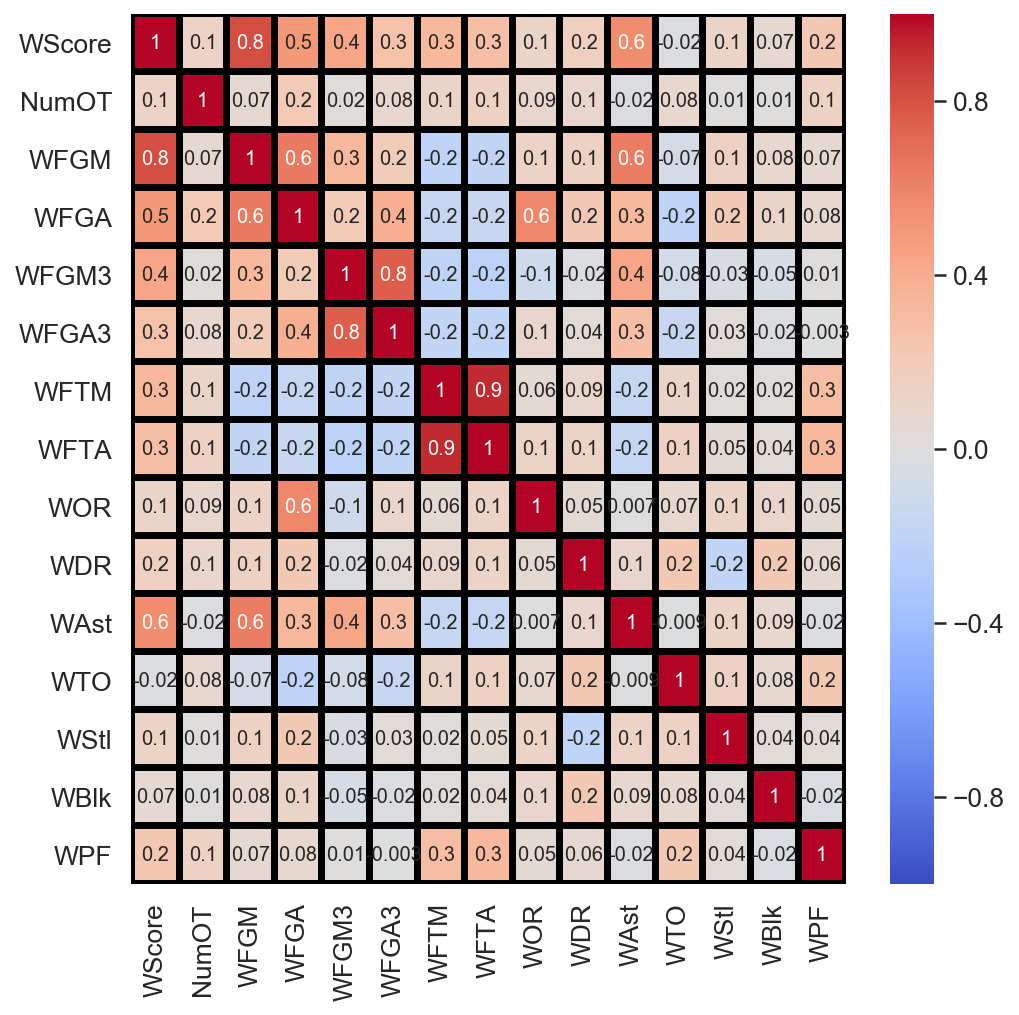

In [15]:
plt.figure(figsize=(8, 8))
#corrplot(capstone_drop.corr(), size_scale=300);

sns.heatmap(capstone_drop.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',fmt='.1g')

Orange means positive, blue means negative. The stronger the color, the larger the correlation magnitude. The heatmap was conducted for in game data for the winning team
Now looking at the chart above, we can see some strong positive correlations with the winning scores. The data with these strong correlations to the winning scores are:
WFGM and WFGA. Other strong positive correlations, with correlation values of 0.9 are WFTA and WFTM

In [16]:
capstone_drop.corr(method ='pearson')

,WScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF
WScore,1.000000,0.127319,0.819807,0.500976,0.440492,0.267608,0.331819,0.293410,0.113763,0.163656,0.558940,-0.017749,0.124911,0.065684,0.229753
NumOT,0.127319,1.000000,0.067622,0.208141,0.016149,0.083734,0.117166,0.133478,0.086160,0.097179,-0.016440,0.082959,0.011456,0.014866,0.147073
WFGM,0.819807,0.067622,1.000000,0.640355,0.329420,0.193870,-0.205721,-0.193207,0.130819,0.140268,0.629116,-0.070106,0.146811,0.082690,0.066071
WFGA,0.500976,0.208141,0.640355,1.000000,0.197344,0.387436,-0.167791,-0.151573,0.579412,0.214954,0.329380,-0.207328,0.215484,0.113554,0.076457
WFGM3,0.440492,0.016149,0.329420,0.197344,1.000000,0.750101,-0.202170,-0.224835,-0.103324,-0.020073,0.443577,-0.084013,-0.032452,-0.049541,0.011553
WFGA3,0.267608,0.083734,0.193870,0.387436,0.750101,1.000000,-0.183460,-0.202171,0.098512,0.042365,0.294447,-0.156811,0.033306,-0.021468,-0.003316
WFTM,0.331819,0.117166,-0.205721,-0.167791,-0.202170,-0.183460,1.000000,0.923881,0.056646,0.090408,-0.168609,0.115128,0.017625,0.016963,0.304256
WFTA,0.293410,0.133478,-0.193207,-0.151573,-0.224835,-0.202171,0.923881,1.000000,0.121587,0.123327,-0.164141,0.134027,0.048728,0.042593,0.329721
WOR,0.113763,0.086160,0.130819,0.579412,-0.103324,0.098512,0.056646,0.121587,1.000000,0.054321,0.007385,0.071090,0.117334,0.098648,0.048787
WDR,0.163656,0.097179,0.140268,0.214954,-0.020073,0.042365,0.090408,0.123327,0.054321,1.000000,0.095114,0.221886,-0.198878,0.224760,0.064247



c. What is the 95% confidence interval for the difference between the standard deviations of the winning scores for the two top performing teams? This analysis will be done with a bootstrap sampling analysis, calculating these differences over 10000 replicates. The teams being considered will be Gonzaga and Kansas.

 We will use a bootstrap method comparing the means of winning scores of two teams over multiple seasons. The two chosen are, Gonzaga and Kansas. These two teams are chosen because they have the highest winning percentages i.e. Winning Percentage is defined as (matches won/total matches played *100)

$H_0$ : there is no difference in standard deviations in the winning scores between  Kansas and Gonzaga
i.e. $\mu_d$ = 0

$H_a$ : there is a difference in standard deviations in the winning scores between Kansas and Gonzaga
i.e. $\mu_d$ = 0

In [17]:
# Function derived from Data camp Statistical Thinking in Python (part 2):Generating many bootstrap replicates

""""Draw bootstrap replicates. 
    Func refers to the type of statistic we want (np.mean / np.median etc.)"""

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates =  np.empty(size)

    # Generate replicates
    for i in range(size): 
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)  # store the statistic from each bs_sample into the new array
    return bs_replicates

In [18]:
# The first thing to do is to associate TeamID to the name of the team. 
#This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]
# Creating the two subset samples of charges to Gonzaga and Kansas group in arrays

kansas=np.array(capstone[capstone['WTeamName']=='kansas'].WScore)
Gonzaga=np.array(capstone[capstone['WTeamName']=='gonzaga'].WScore)

# Calculating the difference in standard deviations between Gonzaga and Kansas winning scores
Gonzaga_std = np.std(Gonzaga,ddof=1)
kansas_std = np.std(kansas,ddof=1)
std_diff = Gonzaga_std - kansas_std


In [19]:
# Using boostrap to test the null hypothesis mentioned above
np.random.seed(47)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Initializing replicates
perm_replicates = np.empty(10000)

# Generating replicates
for i in range(10000):
    perm_sample_1, perm_sample_2 = permutation_sample(Gonzaga, kansas)
    perm_replicates[i] = np.std(perm_sample_1) - np.std(perm_sample_2)

conf_int_lower = np.percentile(perm_replicates, 2.5)
conf_int_upper = np.percentile(perm_replicates, 97.5)
p = np.sum(perm_replicates >=std_diff) / len(perm_replicates)

print("Stardard Deviation: ",std_diff )
print("p-value =", p)

Stardard Deviation:  0.49203269586884524
p-value = 0.1687


 We also get a p-value of 0.17. Thus it is sufficiently unlikely that the null hypothesis is true and thus we fail to reject the null hypothesis. There is a difference in numbers between the winning scores of Gonzaga and Kansas.

In [20]:
np.random.seed(47)

# Computing the difference in means
mean_diff = np.mean(Gonzaga) - np.mean(kansas)

# Concatenating the two samples
conc_mean = np.mean(np.concatenate((Gonzaga, kansas)))

# Shifting the means of both samples to match the concatenated mean
Gonz_shifted = Gonzaga + conc_mean - np.mean(Gonzaga)
kansas_shifted = kansas + conc_mean - np.mean(kansas)

# Initializing replicates 
bs_replicates = np.empty(10000)

# Generating replicates
for i in range(10000):
    Gonz_rep = np.random.choice(Gonz_shifted, size=len(Gonzaga))
    kansas_rep = np.random.choice(kansas_shifted, size=len(kansas))
    bs_replicates[i] = np.mean(Gonz_rep) - np.mean(kansas_rep)

# Computing confidence intervals
conf_int_lower1 = np.percentile(bs_replicates, 2.5)
conf_int_upper1 = np.percentile(bs_replicates, 97.5)
# Print the confidence interval
print('95% confidence interval =', conf_int_lower1,conf_int_upper1 )

95% confidence interval = -1.4236463156146701 1.4045422356365809


In [21]:
# Draw the bootstrap replicates from the shifted dataset
bs_replicates_Gonzaga= draw_bs_reps(Gonz_shifted, np.mean, size=1000)
bs_replicates_kansas = draw_bs_reps(kansas_shifted, np.mean, size=1000)

In [22]:

bsdiff = bs_replicates_Gonzaga - bs_replicates_kansas

#Get the observed difference from the actual dataset
obs_diff = np.mean(Gonzaga) - np.mean(kansas)
obs_diff

0.7096446502178111

In [23]:
# Computing p-value
p = np.sum(bs_replicates >= mean_diff) / len(bs_replicates)
print("p-value =", p)

p-value = 0.1643


In [24]:
mean_diff

0.7096446502178111

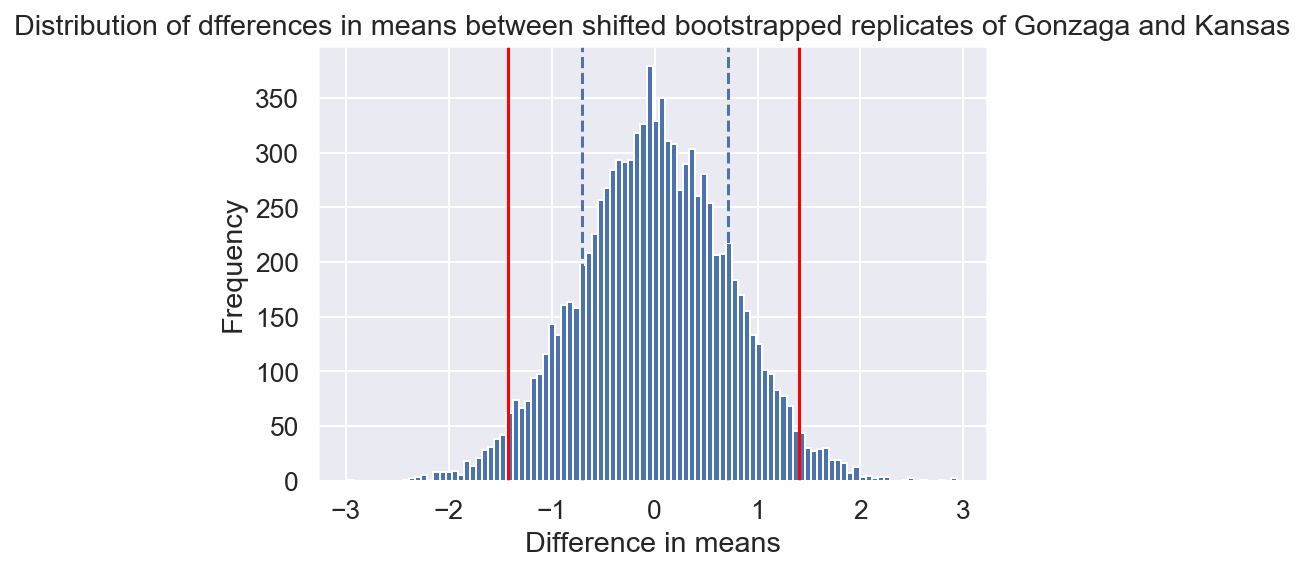

In [25]:
# Plotting the histogram of bootsrapped differences in means
plt.hist(bs_replicates, bins=100)
plt.axvline(mean_diff, linestyle="--")
plt.axvline(-mean_diff, linestyle="--")
plt.axvline(conf_int_lower1, color='red')
plt.axvline(conf_int_upper1, color='red')
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.title('Distribution of dfferences in means between shifted bootstrapped replicates \
of Gonzaga and Kansas');

Interpretation:


The solid red vertical lines correpsond to the 95% lower and upper confidence intervals of expected random differences in means of boostrapped replicates of Gonzaga and Kansas samples.
The dashed blue vertical lines correspond to the observed difference in means between Gonzaga and kansas samples. 


Our Null and Alternative Hypothesis were as follows:


$H_0$ : there is no difference in the means of the winning scores between Kansas and Gonzaga
i.e. $\mu_d$ = 0

$H_a$ : there is a difference in the means of the winning scores between Kansas and Gonzaga 
i.e. $\mu_d$ $\neq$ 0

Our Bootstrap replicates with a 95% confidence interval indicate that the difference in means between the two groups have a 95% chance of lying within [-1.4236463156146701 , 1.4045422356365809].Thus we fail to reject the null hypothesis, and accept the alternative hypothesis. There is a difference in means between the Kansas and Gonzaga winning scores.